![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import gzip
import csv
import numpy as np
import seaborn as sns
from matplotlib import style

In [42]:
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1 = df1.rename(columns = {'title':'movie'})

In [45]:
df4 = pd.read_csv('imdb.title.basics.csv.gz')
df4 = df4.rename(columns = {'primary_title':'movie'})

In [52]:
df11 = pd.read_csv('tn.movie_budgets.csv.gz')
df11['worldwide_gross'] = df11['worldwide_gross'].str[1:]
df11['worldwide_gross'] = df11['worldwide_gross'].str.replace(',', '').astype(np.int64)
df11['domestic_gross'] = df11['domestic_gross'].str[1:]
df11['domestic_gross'] = df11['domestic_gross'].str.replace(',', '').astype(np.int64)
df11['production_budget'] = df11['production_budget'].str[1:]
df11['production_budget'] = df11['production_budget'].str.replace(',', '').astype(np.int64)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [124]:
production = df11[df11.production_budget < 1000000].index
df11.drop(production, inplace=True)
domestic = df11[df11.domestic_gross < 1].index
df11.drop(domestic, inplace=True)
worldwide = df11[df11.worldwide_gross < 1].index
df11.drop(worldwide, inplace=True)
df11.set_index('movie')

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747
...,...,...,...,...,...
Sparkler,95,"Mar 19, 1999",1000000,5494,5494
The Helixâ¦Loaded,96,"Mar 18, 2005",1000000,3700,3700
Childless,97,"May 15, 2015",1000000,1036,1036


In [127]:
BigFrame = df11.merge(df1, on='movie').merge(df4, on='movie').drop(columns=['tconst', 'original_title', 'start_year', 'id', 'domestic_gross_y'])

In [128]:
BigFrame = BigFrame.drop_duplicates(subset='movie').set_index('movie')
BigFrame['month'] = BigFrame['release_date'].str[:3]
BigFrame = BigFrame.dropna()
BigFrame.dropna(inplace=True)
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].str.replace(',', '')
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].str.replace('.', '')
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].astype(np.int64)
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].sort_values(ascending=False)
BigFrame.year = BigFrame.year.astype(int)

<ipython-input-128-a1ef15600135>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  BigFrame['foreign_gross'] = BigFrame['foreign_gross'].str.replace('.', '')


In [129]:
ForeignF = BigFrame.set_index(keys='foreign_gross')
DomesticF = BigFrame.set_index(keys='domestic_gross_x')
ForeignF['genres'] = ForeignF['genres'].str.split(',')
DomesticF['genres'] = DomesticF['genres'].str.split(',')
ForeignF = ForeignF.drop(columns=['worldwide_gross'], axis=1).drop(columns='domestic_gross_x')
Domestic = DomesticF.drop(columns=['worldwide_gross'], axis=1).drop(columns='foreign_gross')

In [130]:
def getgross(g):
    listi = []
    for k, v in ForeignF['genres'].items():
        if g in v:
            listi.append(k)
    return listi
faction = getgross('Action')
#faction = np.mean(faction)
fcomedy = getgross('Comedy')
#fcomedy = np.mean(fcomedy)
fadventure = getgross('Adventure')
#fadventure = np.mean(fadventure)
fthriller = getgross('Thriller')
#fthriller = np.mean(fthriller)
fcrime = getgross('Crime')
#fcrime = np.mean(fcrime)
fromance = getgross('Romance')
#fromance = np.mean(fromance)
fhorror = getgross('Horror')
#fhorror = np.mean(fhorror)
fscifi = getgross('Sci-Fi')
#fscifi = np.mean(fscifi)
fbiography = getgross('Biography')
#fbiography = np.mean(fbiography)
fmystery = getgross('Mystery')
#fmystery = np.mean(fmystery)
ffamily = getgross('Family')
#ffamily = np.mean(ffamily)
fmusic = getgross('Music')
#fmusic = np.mean(fmusic)
fdocumentary = getgross('Documentary')
#fdocumentary = np.mean(fdocumentary)

mfaction = np.median(faction)
mfcomedy = np.median(fcomedy)
mfadventure = np.median(fadventure)
mfthriller = np.median(fthriller)
mfcrime = np.median(fcrime)
mfromance = np.median(fromance)
mfhorror = np.median(fhorror)
mfscifi = np.median(fscifi)
mfbiography = np.median(fbiography)
mfmystery = np.median(fmystery)
mffamily = np.median(ffamily)
mfmusic = np.median(fmusic)
mfdocumentary = np.median(fdocumentary)

In [131]:
ForGrossMed = [mfcomedy, mfaction, mfadventure, mfthriller, mfcrime, mfromance, mfhorror, mfscifi, mfbiography, mfmystery, mffamily, mfmusic, mfdocumentary]
ForGrossMed = list(ForGrossMed)

In [132]:
def getgross(g):
    listi = []
    for k, v in DomesticF['genres'].items():
        if g in v:
            listi.append(k)
    return listi
daction = getgross('Action')
#daction = np.mean(faction)
dcomedy = getgross('Comedy')
#dcomedy = np.mean(fcomedy)
dadventure = getgross('Adventure')
#dadventure = np.mean(fadventure)
dthriller = getgross('Thriller')
#dthriller = np.mean(fthriller)
dcrime = getgross('Crime')
#dcrime = np.mean(fcrime)
dromance = getgross('Romance')
#dromance = np.mean(fromance)
dhorror = getgross('Horror')
#dhorror = np.mean(fhorror)
dscifi = getgross('Sci-Fi')
#dscifi = np.mean(fscifi)
dbiography = getgross('Biography')
#dbiography = np.mean(fbiography)
dmystery = getgross('Mystery')
#dmystery = np.mean(fmystery)
dfamily = getgross('Family')
#dfamily = np.mean(ffamily)
dmusic = getgross('Music')
#dmusic = np.mean(fmusic)
ddocumentary = getgross('Documentary')
#ddocumentary = np.mean(fdocumentary)

mdaction = np.median(daction)
mdcomedy = np.median(dcomedy)
mdadventure = np.median(dadventure)
mdthriller = np.median(dthriller)
mdcrime = np.median(dcrime)
mdromance = np.median(dromance)
mdhorror = np.median(dhorror)
mdscifi = np.median(dscifi)
mdbiography = np.median(dbiography)
mdmystery = np.median(dmystery)
mdfamily = np.median(dfamily)
mdmusic = np.median(dmusic)
mddocumentary = np.median(ddocumentary)


In [133]:
DomGrossMed = [mdcomedy, mdaction, mdadventure, mdthriller, mdcrime, mdromance, mdhorror, mdscifi, mdbiography, mdmystery, mdfamily, mdmusic, mddocumentary]
DomGrossMed = list(DomGrossMed)

In [134]:
action = 0
for genre in BigFrame['genres']:
    if 'Action' in genre:
        action += 1
adventure = 0
for genre in BigFrame['genres']:
    if 'Adventure' in genre:
        adventure += 1
fantasy = 0
for genre in BigFrame['genres']:
    if 'Fantasy' in genre:
        fantasy += 1
scifi = 0
for genre in BigFrame['genres']:
    if 'Sci' in genre:
        scifi += 1
thriller = 0
for genre in BigFrame['genres']:
    if 'Thriller' in genre:
        thriller += 1
romance = 0
for genre in BigFrame['genres']:
    if 'Romance' in genre:
        romance += 1
comedy = 0
for genre in BigFrame['genres']:
    if 'Comedy' in genre:
        comedy += 1
music = 0
for genre in BigFrame['genres']:
    if 'Music' in genre:
        music += 1
biography = 0
for genre in BigFrame['genres']:
    if 'Biography' in genre:
        biography += 1
horror = 0
for genre in BigFrame['genres']:
    if 'Horror' in genre:
        horror += 1
mystery = 0
for genre in BigFrame['genres']:
    if 'Mystery' in genre:
        mystery += 1
documentary = 0
for genre in BigFrame['genres']:
    if 'Documentary' in genre:
        documentary += 1
crime = 0
for genre in BigFrame['genres']:
    if 'Crime' in genre:
        crime += 1
family = 0
for genre in BigFrame['genres']:
    if 'Family' in genre:
        family += 1
        
ylabels = ['0M', '20M', '40M', '60M', '80M', '100M']        
Genres = [comedy, action, adventure, thriller, crime, romance, horror, scifi, biography, mystery, family, music, documentary]
Genres_i = ['Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Scifi', 'Biography', 'Mystery', 'Family', 'Music', 'Documentary']
Genres_d = ['Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Scifi', 'Biography', 'Mystery', 'Family', 'Music', 'Documentary']

<ipython-input-135-18ad375045d9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


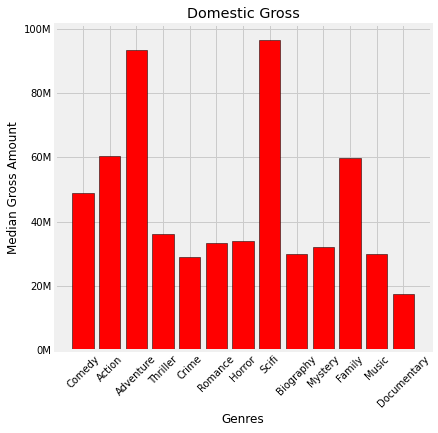

In [135]:
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x=Genres_i, height=DomGrossMed,  color='Red', edgecolor='black')
ax.tick_params(axis='x', rotation=45);
ax.set_yticklabels(labels=ylabels)
ax.set_title('Domestic Gross')
ax.set_ylabel('Median Gross Amount')
ax.set_xlabel('Genres');

<ipython-input-136-2ebf3c8a4d17>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels1)


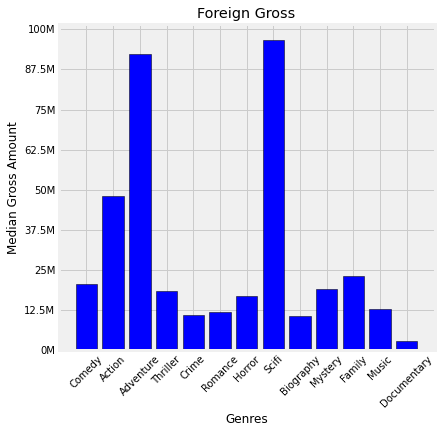

In [136]:
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x=Genres_d, height=ForGrossMed,  color='Blue', edgecolor='black')
ax.tick_params(axis='x', rotation=45, )
ylabels1 = ['0M', '12.5M', '25M', '37.5M', '50M', '62.5M', '75M', '87.5M', '100M']
ax.set_yticklabels(labels=ylabels1)
ax.set_title('Foreign Gross')
ax.set_ylabel('Median Gross Amount')
ax.set_xlabel('Genres');

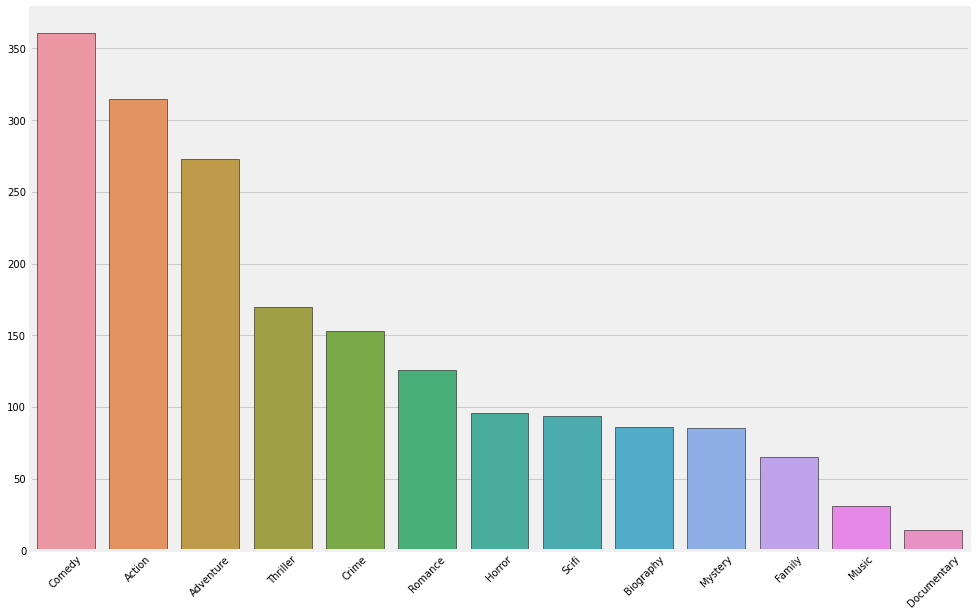

In [137]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=Genres_i, y=Genres, edgecolor='black')
ax.tick_params(axis='x', rotation=45)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***